In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT
%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
pion_lay_data = pd.read_pickle("layer_data_pion_100Gev.pkl")
pion_lay_data.drop([25212, 87715, 90156, 21989], inplace = True)

In [3]:
positron_features = pd.read_pickle("positron_features.pkl")
pion_features = pd.read_pickle("pion_features.pkl")

In [4]:
positron_features

,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
0,106.647715,0.778403,0.007299,583,2.427076,2.309780,positron
1,108.479556,0.000000,0.000000,626,2.190529,2.308517,positron
2,112.881255,0.410685,0.003638,708,2.378296,2.377697,positron
3,111.294251,0.251572,0.002260,675,2.521133,2.265338,positron
4,108.185705,0.498679,0.004609,628,2.385572,2.417429,positron
...,...,...,...,...,...,...,...
96135,107.256171,0.311049,0.002900,643,2.385014,2.385780,positron
96136,104.429344,0.000000,0.000000,667,2.347944,2.208512,positron
96137,109.856476,0.804405,0.007322,590,2.454551,2.299371,positron
96138,104.561262,0.178089,0.001703,597,2.190156,2.383718,positron


In [5]:
pion_features

,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
0,27.515070,56.474125,2.052480,502,4.083595,4.083595,pion
1,27.472663,46.704172,1.700023,558,4.118141,4.118141,pion
2,0.924583,168.001015,181.704553,304,3.263603,3.263603,pion
3,17.308305,73.956949,4.272917,421,4.249429,4.249429,pion
4,63.231133,22.849855,0.361370,687,2.821526,2.821526,pion
...,...,...,...,...,...,...,...
99499,55.868395,24.915433,0.445967,490,2.849999,2.849999,pion
99500,8.902156,75.444065,8.474808,675,5.500335,5.500335,pion
99501,0.424126,100.422493,236.775042,424,5.303751,5.303751,pion
99502,7.931426,97.656805,12.312642,331,4.213647,4.213647,pion


In [6]:
#features = pd.concat([pion_features.sample(frac=0.5), positron_features.sample(frac=0.5)])
features = pd.concat([pion_features, positron_features])
features = features.sample(frac=1)
features

,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
25222,0.672941,86.117770,127.972178,638,4.851434,4.851434,pion
10266,0.421882,101.796128,241.290287,334,4.551489,4.551489,pion
59210,42.171028,36.084991,0.855682,330,3.929862,3.929862,pion
27870,109.337717,0.016889,0.000154,635,2.385097,2.393894,positron
91717,35.923052,88.028717,2.450480,658,3.157460,3.157460,pion
...,...,...,...,...,...,...,...
54237,0.402814,153.798198,381.809028,759,3.576501,3.576501,pion
24945,98.111890,1.797044,0.018316,569,2.209766,2.474833,positron
82923,5.930739,109.285165,18.426904,233,4.458042,4.458042,pion
3121,0.451750,124.950394,276.591776,301,3.260805,3.260805,pion


In [7]:
X = features[[ "Num_Hits", "stdx", "stdy" ]].values
X

array([[638.        ,   4.85143375,   4.85143375],
       [334.        ,   4.55148888,   4.55148888],
       [330.        ,   3.92986226,   3.92986226],
       ...,
       [233.        ,   4.45804167,   4.45804167],
       [301.        ,   3.26080537,   3.26080537],
       [353.        ,   4.5048728 ,   4.5048728 ]])

In [8]:
y = features.particle.values
y

array(['pion', 'pion', 'pion', ..., 'pion', 'pion', 'pion'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_dt, y_train, y_dt = train_test_split( X, y, test_size=0.3, random_state=4)
X_dev, X_test, y_dev, y_test = train_test_split( X_dt, y_dt, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Dev set:', X_dev.shape,  y_dev.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136948, 3) (136948,)
Dev set: (29346, 3) (29346,)
Test set: (29346, 3) (29346,)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
no_of_depths=40

ac=[]

for d in range(1,no_of_depths+1):
    model_DT = DecisionTreeClassifier(criterion="entropy", max_depth=d).fit(X_train, y_train)
    yhat=model_DT.predict(X_dev)
    ac.append(metrics.accuracy_score(y_dev,yhat))
    
print((ac))
print(len(ac))
print("max accuracy = ", max(ac))
print("The best depth = ", ac.index(max(ac))+1)

[0.9508280515232059, 0.9784979213521434, 0.986710284195461, 0.9869828937504259, 0.9886185510802153, 0.9900156750494105, 0.990151979826893, 0.9913446466298643, 0.9913105704354938, 0.9913105704354938, 0.9915831799904586, 0.9922987800722415, 0.9921283991003884, 0.9920261705172766, 0.9920602467116473, 0.9920602467116473, 0.9920602467116473, 0.9920943229060178, 0.9920943229060178, 0.9917194847679411, 0.9918898657397942, 0.9916172561848293, 0.9919239419341648, 0.9916513323791999, 0.9915491037960881, 0.991378722824235, 0.990935732297417, 0.9909698084917876, 0.9909016561030464, 0.9906631227424522, 0.9902882846043753, 0.9904586655762284, 0.9904927417705991, 0.9904245893818578, 0.9904927417705991, 0.9903564369931166, 0.9903564369931166, 0.9904245893818578, 0.9904245893818578, 0.9902542084100048]
40
max accuracy =  0.9922987800722415
The best depth =  12


In [1]:
plt.figure(figsize=[7,5])
plt.plot([i for i in range(1,41)], np.array(ac)*100, "r.",linestyle="-",  markersize=10)
plt.title("Accuracy")
plt.xlabel("Depth of the Decision Tree")
plt.ylabel("Accuracy on Development set (%)")
#plt.xticks(ticks=[4*i for i in range(1,11)])
plt.grid(linestyle='--')
plt.show()

NameError: name 'plt' is not defined

In [41]:
model_D_T = DecisionTreeClassifier(criterion="entropy", max_depth=12).fit(X_train, y_train)
yp_dev=model_D_T.predict(X_dev)
yp_test=model_D_T.predict(X_test)
print("Accuracy of Dev set = ", metrics.accuracy_score(y_dev,yp_dev))
print("Accuracy of Test set = ", metrics.accuracy_score(y_test,yp_test))

Accuracy of Dev set =  0.9922306276835003
Accuracy of Test set =  0.9919239419341648


In [42]:
list(y_test[y_test!=yp_test]).count("pion")/y_test.size

0.006099638792339671

In [43]:
list(y_test[y_test!=yp_test]).count("positron")/y_test.size

0.001976419273495536

In [32]:
from sklearn import tree

In [33]:
import graphviz

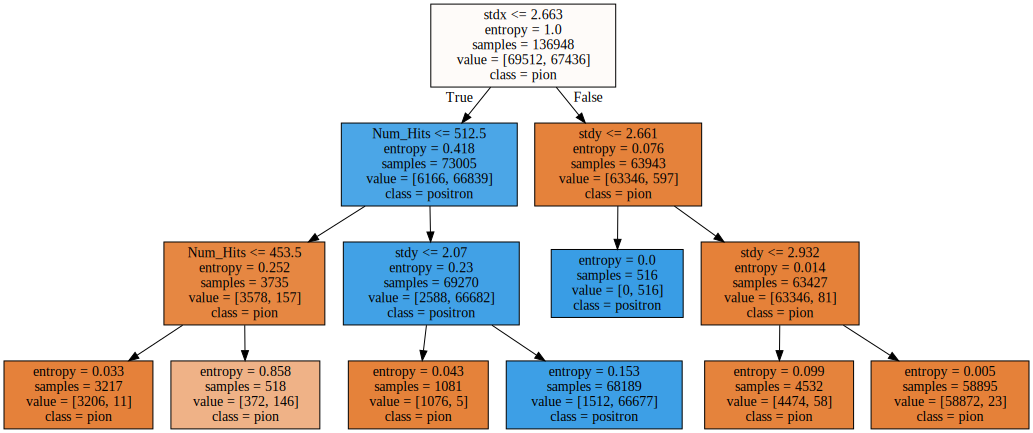

In [34]:
model_img = tree.export_graphviz(model_D_T, out_file=None, 
                                feature_names=[ "Num_Hits", "stdx", "stdy" ],  
                                class_names=["pion","positron"],
                                filled=True)

graph = graphviz.Source(model_img, format="png") 
graph

In [26]:
#graph.render("PID_DT_eg")

'PID_DT_eg.png'

In [47]:
pred_pion_data = model_D_T.predict(pion_features[[ "Num_Hits", "stdx", "stdy" ]].values)
sum(pred_pion_data=="pion")/99501

0.9894473422377664

In [48]:
pion_wrong_pred = pion_features.loc[pred_pion_data=="positron"]
print(pion_wrong_pred.index)
pion_wrong_pred

Int64Index([   48,   148,   443,   495,   703,   746,   870,   920,  1223,
             1347,
            ...
            98661, 98726, 98823, 99020, 99055, 99087, 99211, 99252, 99434,
            99463],
           dtype='int64', length=1050)


,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
48,80.272592,5.461461,0.068036,735,2.399406,2.399406,pion
148,97.323835,10.865973,0.111648,658,2.496202,2.496202,pion
443,94.510299,2.622351,0.027747,639,2.434697,2.434697,pion
495,107.500210,3.791142,0.035266,644,2.346455,2.346455,pion
703,99.213938,1.525732,0.015378,697,2.454509,2.454509,pion
...,...,...,...,...,...,...,...
99087,0.597922,19.402374,32.449676,702,2.203141,2.203141,pion
99211,0.390439,8.631724,22.107742,647,2.148731,2.148731,pion
99252,106.710000,2.766174,0.025922,535,2.460637,2.460637,pion
99434,63.116867,44.135355,0.699264,513,2.484288,2.484288,pion


In [49]:
pion_wrong_pred_lay_data = pion_lay_data.loc[pion_wrong_pred.index]
pion_wrong_pred_lay_data

,event,rechit_layer,num_hits_layer,rechit_energy,rechit_energy_layer,shower_start_layer
48,49,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[11, 11, 16, 25, 20, 25, 32, 32, 41, 35, 32, 2...","[1.3795388, 4.0349483, 9.276806, 2.1892653, 1....","[43.037964433431625, 77.73210164904594, 181.40...",1
148,149,"[1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, ...","[1, 1, 1, 1, 1, 2, 4, 6, 12, 10, 20, 21, 24, 2...","[0.9554031, 1.7903633, 0.878123, 0.81728286, 0...","[0.9554030895233154, 1.7903633117675781, 0.878...",7
443,444,"[1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, ...","[2, 3, 6, 8, 10, 23, 30, 30, 37, 39, 43, 49, 4...","[0.70092314, 3.1206405, 1.6107534, 8.148638, 7...","[3.8215636610984802, 16.857794642448425, 57.31...",3
495,496,"[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, ...","[1, 1, 1, 1, 1, 1, 5, 8, 15, 18, 25, 25, 27, 3...","[1.6529484, 0.9256404, 1.7396865, 2.040682, 13...","[1.6529483795166016, 0.9256404042243958, 1.739...",5
703,704,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[6, 8, 11, 19, 23, 13, 16, 15, 19, 16, 12, 19,...","[1.0452479, 17.53911, 38.146282, 3.893742, 1.6...","[65.18130624294281, 94.87932723760605, 89.0238...",1
...,...,...,...,...,...,...
99087,19484,"[1, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, ...","[1, 2, 1, 2, 6, 10, 14, 21, 21, 26, 30, 30, 38...","[1.3548079, 1.1691233, 1.70055, 1.7827966, 3.4...","[1.3548078536987305, 2.869673252105713, 1.7827...",5
99211,19608,"[1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, ...","[1, 4, 7, 9, 18, 18, 21, 30, 29, 36, 32, 25, 2...","[0.8797353, 10.154694, 24.561375, 1.3188245, 1...","[0.8797352910041809, 141.2695348262787, 77.854...",2
99252,19649,"[1, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 9, 10, 11...","[1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 5, 4, 17,...","[1.3612552, 1.0009502, 7.2138233, 3.311316, 1....","[1.361255168914795, 1.0009502172470093, 7.2138...",11
99434,19831,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.976562, 0.81218207, 1.0571266, 0.97326106, ...","[2.976562023162842, 0.8121820688247681, 1.0571...",18


In [51]:
pion_wrong_pred_shower_lay = pion_wrong_pred_lay_data.shower_start_layer.values

c=ROOT.TCanvas()

H_pion = ROOT.TH1F("H_pion","Shower Start Location;Shower start location (layer number);Normalized Entries",40,-0.5,40.5)

for i in range(1050):
    H_pion.Fill(pion_wrong_pred_shower_lay[i])

H_pion.SetLineColor(4)    
H_pion.DrawNormalized()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [53]:
pred_positron_data = model_D_T.predict(positron_features[[ "Num_Hits", "stdx", "stdy" ]].values)
sum(pred_positron_data=="positron")/99500

0.9631055276381909

In [54]:
positron_wrong_pred = positron_features.loc[pred_positron_data=="pion"]
positron_wrong_pred

,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
346,106.472050,1.936593,0.018189,626,2.711973,2.669887,positron
655,101.319780,0.699225,0.006901,538,2.307964,2.164307,positron
1057,107.083226,0.961933,0.008983,661,2.552414,2.564502,positron
1392,50.999183,37.253672,0.730476,716,3.177149,3.213167,positron
2294,99.177425,0.815100,0.008219,499,2.425308,2.471803,positron
...,...,...,...,...,...,...,...
94321,109.957160,0.177651,0.001616,697,2.538210,2.538963,positron
94459,109.236594,2.299842,0.021054,731,2.527730,2.531938,positron
94703,105.875247,1.979765,0.018699,560,2.505391,2.478904,positron
94876,110.188230,0.662487,0.006012,677,2.610135,2.652636,positron


In [55]:
npion = pion_wrong_pred.particle.size
npositron = positron_wrong_pred.particle.size

In [56]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_ECAL; Energy_ECAL (Gev); Normalized Entries",100, -2, 170)
H_positron = ROOT.TH1F("H_positron","Energy_ECAL; Energy_ECAL (Gev); Normalized Entries",100, -2, 170)

positron_wrong_pred_Ecal = positron_wrong_pred.Energy_Ecal.values
pion_wrong_pred_Ecal = pion_wrong_pred.Energy_Ecal.values

for i in range(npion):
    H_pion.Fill(pion_wrong_pred_Ecal[i])
    
for i in range(npositron):
    H_positron.Fill(positron_wrong_pred_Ecal[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [57]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL; Energy_HCAL (Gev); Normalized Entries",100, -2, 70)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL; Energy_HCAL (Gev); Normalized Entries",100, -2, 70)

positron_wrong_pred_Hcal = positron_wrong_pred.Energy_Hcal.values
pion_wrong_pred_Hcal = pion_wrong_pred.Energy_Hcal.values

for i in range(npion):
    H_pion.Fill(pion_wrong_pred_Hcal[i])
    
for i in range(npositron):
    H_positron.Fill(positron_wrong_pred_Hcal[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [58]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -.02, 1)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, -0.02, 1)

positron_wrong_pred_Hcal_Ecal = positron_wrong_pred["Energy_Hcal/Ecal"].values
pion_wrong_pred_Hcal_Ecal = pion_wrong_pred["Energy_Hcal/Ecal"].values

for i in range(npion):
    H_pion.Fill(pion_wrong_pred_Hcal_Ecal[i])
    
for i in range(npositron):
    H_positron.Fill(positron_wrong_pred_Hcal_Ecal[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)


H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [59]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","std_x; std_x (cm); Normalized Entries",100, -0.5, 6)
H_positron = ROOT.TH1F("H_positron","std_x; std_x (cm); Normalized Entries",100, -0.5, 6)

positron_wrong_pred_stdx = positron_wrong_pred.stdx.values
pion_wrong_pred_stdx = pion_wrong_pred.stdx.values

for i in range(npion):
    H_pion.Fill(pion_wrong_pred_stdx[i])
    
for i in range(npositron):
    H_positron.Fill(positron_wrong_pred_stdx[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_pion.DrawNormalized()
H_positron.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [60]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","std_y; std_y (cm); Normalized Entries",100, -0.5, 6)
H_positron = ROOT.TH1F("H_positron","std_y; std_y (cm); Normalized Entries",100, -0.5, 6)

positron_wrong_pred_stdy = positron_wrong_pred.stdy.values
pion_wrong_pred_stdy = pion_wrong_pred.stdy.values

for i in range(npion):
    H_pion.Fill(pion_wrong_pred_stdy[i])
    
for i in range(npositron):
    H_positron.Fill(positron_wrong_pred_stdy[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_pion.DrawNormalized()
H_positron.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
model_GBC = GradientBoostingClassifier().fit(X_train, y_train)
yhat=model_GBC.predict(X_dev)
print(metrics.accuracy_score(y_dev,yhat))

0.9911061132692701
